In [42]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

#Para manejar csv
import pandas as pd
import csv

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!ls
%mkdir data
!ls

gdrive	sample_data
data  gdrive  sample_data


In [43]:
import shutil
#Para copiar un archivo de drive a data
#shutil.copy("direccion inicial","direccion final")
shutil.copy("/content/gdrive/MyDrive/dataset/Brouken.csv","/content/data/dat_01.csv")

'/content/data/dat_01.csv'

In [44]:
#Con numpy
datos_awa = (np.genfromtxt("/content/data/dat_01.csv", delimiter=","))[1:]
print(datos_awa)
print(datos_awa.shape)

[[1.         0.37059426 0.42438945 ... 0.56405011 1.         0.01646874]
 [1.         0.46429094 0.53821413 ... 0.57017495 1.         0.02079431]
 [1.         0.42607127 0.49901875 ... 0.56370608 1.         0.01647411]
 ...
 [0.         0.47272461 0.533744   ... 0.5651584  1.         0.09764874]
 [0.         0.50626432 0.5599106  ... 0.56530151 1.         0.04400945]
 [0.         0.49305319 0.57010467 ... 0.56516694 1.         0.23390224]]
(6819, 96)


In [49]:
# Con Numpy
data = (np.genfromtxt("/content/data/dat_01.csv", delimiter=','))[1:]
#Cambiamos estos dos valores al valor n de las x
X, y = data[:, 1:96], data[:, 0]
print(X[0])
print(X)
print(y)

[3.70594257e-01 4.24389446e-01 4.05749772e-01 6.01457213e-01
 6.01457213e-01 9.98969203e-01 7.96887146e-01 8.08809361e-01
 3.02646434e-01 7.80984850e-01 1.25696869e-04 0.00000000e+00
 4.58143144e-01 7.25072507e-04 0.00000000e+00 1.47949939e-01
 1.47949939e-01 1.47949939e-01 1.69140588e-01 3.11664427e-01
 1.75597804e-02 9.59205276e-02 1.38736160e-01 2.21022784e-02
 8.48194995e-01 6.88979463e-01 6.88979463e-01 2.17535386e-01
 4.98000000e+09 3.26977269e-04 2.63099984e-01 3.63725271e-01
 2.25896331e-03 1.20775509e-03 6.29951302e-01 2.12659244e-02
 2.07576261e-01 7.92423739e-01 5.02445473e-03 3.90284354e-01
 6.47850249e-03 9.58848340e-02 1.37757334e-01 3.98035698e-01
 8.69565217e-02 1.81388413e-03 3.48736428e-03 1.82092597e-04
 1.16500653e-04 3.29032258e-02 3.41641820e-02 3.92912869e-01
 3.71353016e-02 6.72775292e-01 1.66672959e-01 1.90642959e-01
 4.09440595e-03 1.99677086e-03 1.47336025e-04 1.47308450e-01
 3.34015171e-01 2.76920158e-01 1.03598999e-03 6.76269176e-01
 7.21274552e-01 3.390770

In [23]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

  
    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [24]:
# Prueba la implementacion de la funcion sigmoid
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


In [50]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción. 
m, n = X.shape
print(X.shape)
print(X[:5])
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)
print(X[:2])
print("_______-----"*10)
print(X[1,1:96])

(6819, 95)
[[3.70594257e-01 4.24389446e-01 4.05749772e-01 6.01457213e-01
  6.01457213e-01 9.98969203e-01 7.96887146e-01 8.08809361e-01
  3.02646434e-01 7.80984850e-01 1.25696869e-04 0.00000000e+00
  4.58143144e-01 7.25072507e-04 0.00000000e+00 1.47949939e-01
  1.47949939e-01 1.47949939e-01 1.69140588e-01 3.11664427e-01
  1.75597804e-02 9.59205276e-02 1.38736160e-01 2.21022784e-02
  8.48194995e-01 6.88979463e-01 6.88979463e-01 2.17535386e-01
  4.98000000e+09 3.26977269e-04 2.63099984e-01 3.63725271e-01
  2.25896331e-03 1.20775509e-03 6.29951302e-01 2.12659244e-02
  2.07576261e-01 7.92423739e-01 5.02445473e-03 3.90284354e-01
  6.47850249e-03 9.58848340e-02 1.37757334e-01 3.98035698e-01
  8.69565217e-02 1.81388413e-03 3.48736428e-03 1.82092597e-04
  1.16500653e-04 3.29032258e-02 3.41641820e-02 3.92912869e-01
  3.71353016e-02 6.72775292e-01 1.66672959e-01 1.90642959e-01
  4.09440595e-03 1.99677086e-03 1.47336025e-04 1.47308450e-01
  3.34015171e-01 2.76920158e-01 1.03598999e-03 6.76269176e-

In [47]:
print(X.shape)

(6819, 96)


In [27]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    
    return J

In [28]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []
    
    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
       
        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


theta calculado por el descenso por el gradiente: [-5.95853444e-09 -4.52050171e-09 -5.06963585e-09 -4.90800455e-09
 -3.81409706e-09 -3.81246902e-09 -5.93872102e-09 -4.73843376e-09
 -4.81004230e-09 -1.81472492e-09 -4.64870925e-09 -8.27611408e-03
 -1.34038489e-03 -2.86797747e-09 -8.55148336e-02 -1.68929571e-09
 -1.65838287e-09 -1.65970607e-09 -1.65862809e-09 -2.06838933e-09
 -2.02921499e-09 -6.85578535e-02 -1.04235211e-09 -1.75291301e-09
 -1.56999069e-10 -5.06851607e-09 -4.16042303e-09 -4.15964593e-09
 -1.30750004e-09 -1.31382201e-02  2.10339639e-01 -1.59475141e-09
 -2.32163136e-09 -6.43239504e-03  1.56122576e-03 -3.76100972e-09
  1.67990073e-05  5.47660137e-10 -6.50619458e-09 -5.68017189e-11
 -1.97168207e-09  4.33766405e-11 -1.03719137e-09 -1.70059467e-09
 -2.30467791e-09 -1.47041293e-09 -5.52508359e-02 -4.42901525e-02
 -5.56566063e-03  7.59530428e-03 -1.79482471e-10  3.29488193e-02
 -2.68847950e-09 -3.77472636e-03 -5.98511958e-09 -4.45445843e-09
 -4.40274053e-09 -2.70160459e-09 -2.8587

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


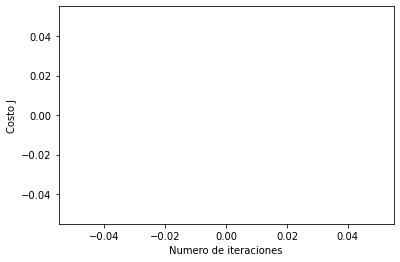

In [63]:
# Elegir algun valor para alpha (probar varias alternativas)

#Caso 1
alpha = 0.0001
num_iters = 2000


"""Caso 2 aumentar alpha y mantener iteraciones (Acotacion: Por mas que baje alpha no se vizualiza el grafico)"""
#alpha = 0.0000000001
#num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(96)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=4)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar Bancarrota
X_array = X[1]
X_array1 = X[2248]
print("-----{}".format(X_array))
#X_array1 = [1, 90, 90, 80, 76, 82, 11, 65, 85, 43, 50]
#aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto
br1 = sigmoid(np.dot(X_array, theta))
br2 = sigmoid(np.dot(X_array1, theta))
print("\n\nEL CASO DE ESTUDIO ES PARA EVALUAR SI UNA EMPRESA ENTRARA EN BANCARROTA = 1 O NO = 0 """) 
print('Caso 1 de estudio (0) :  (usando el descenso por el gradiente):{:.0f}'.format(br1))
print('Caso 2 de estudio (1) :  (usando el descenso por el gradiente):{:.0f}'.format(br2))